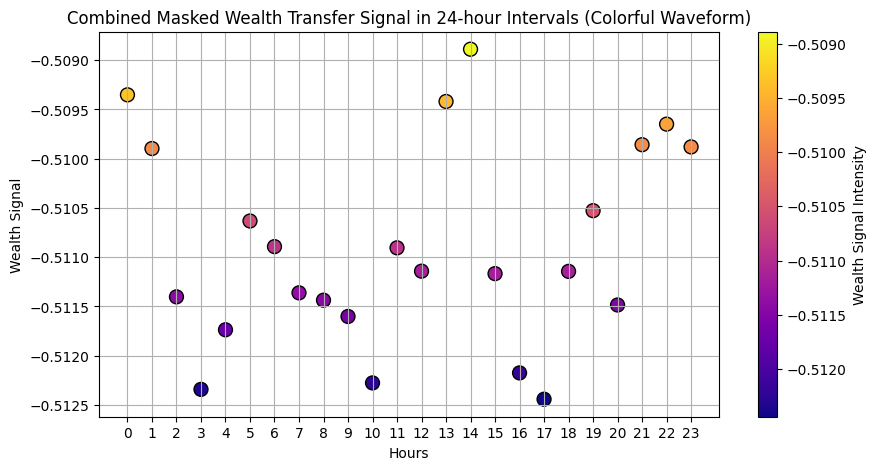

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Simulate wealth distribution for 100 people across 24 hours
wealth_distribution = torch.randn(32, 24, 1)  # (batch_size, 24 hours, 1 wealth feature)

# Define the target direction (randomly initialized or learned) for 24 hours
target_direction = torch.randn(32, 24, 1)  # (batch_size, 24 hours, 1 feature for direction)

# Define the model with LSTM and VPN-like layer for protection
class WealthTransferModelWithVPN(nn.Module):
    def __init__(self, input_size, hidden_size, lstm_hidden_size, output_size, vpn_size):
        super(WealthTransferModelWithVPN, self).__init__()
        # First dense layer
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()

        # LSTM layer to store wealth signal in the "nerves"
        self.lstm = nn.LSTM(hidden_size, lstm_hidden_size, batch_first=True)

        # Final dense layer to transfer wealth in the target direction
        self.fc2 = nn.Linear(lstm_hidden_size, output_size)
        
        # VPN-like encryption layer (simulated with a non-linear transformation)
        self.vpn_layer = nn.Linear(output_size, vpn_size)  # A layer to "encrypt" the output
        self.decrypt_layer = nn.Linear(vpn_size, output_size)  # To recover the original output

    def forward(self, x, target):
        # Combine wealth signal with target information (concatenate along the feature dimension)
        x = torch.cat((x, target), dim=-1)

        # Process through the first dense layer
        x = self.relu(self.fc1(x))

        # Pass through the LSTM layer (to store the wealth signal in the nerves)
        x, _ = self.lstm(x)

        # Output layer to compute the final wealth transfer signal
        x = self.fc2(x)

        # Pass through the VPN encryption layer
        encrypted_output = torch.sigmoid(self.vpn_layer(x))  # Apply transformation (like encryption)
        
        # Simulate decryption by passing through another layer
        decrypted_output = self.decrypt_layer(encrypted_output)

        return decrypted_output  # Return the "secure" output

# Initialize the model
input_size = wealth_distribution.shape[-1] + target_direction.shape[-1]  # Input: wealth + target direction
hidden_size = 64  # Hidden layer size
lstm_hidden_size = 32  # LSTM hidden size (for storing wealth signal in the nerves)
output_size = wealth_distribution.shape[-1]  # Output size matches wealth distribution
vpn_size = 128  # Size of the "VPN" encryption layer

model = WealthTransferModelWithVPN(input_size, hidden_size, lstm_hidden_size, output_size, vpn_size)


with torch.no_grad():
    output_signal = model(wealth_distribution, target_direction)
    
wealth_waveform = output_signal[0].squeeze().numpy()

mask1 = wealth_waveform > 0.5

masked_signal1 = wealth_waveform * mask1

mask2 = wealth_waveform < 0.2

masked_signal2 = wealth_waveform * mask2

combined_masked_signal = masked_signal1 + masked_signal2

hours = list(range(24))

plt.figure(figsize=(10, 5))

scatter = plt.scatter(hours, combined_masked_signal, c=combined_masked_signal, cmap='plasma', s=100, edgecolor='k', marker='o')

plt.colorbar(scatter, label="Wealth Signal Intensity")

plt.title('Combined Masked Wealth Transfer Signal in 24-hour Intervals (Colorful Waveform)')
plt.xlabel('Hours')
plt.ylabel('Wealth Signal')
plt.xticks(hours)
plt.grid(True)
plt.show()